In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv('/content/online_shoppers_intention.csv')

In [34]:
data.head

<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0            

In [35]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [36]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [37]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Month'] = label_encoder.fit_transform(data['Month'])


In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [39]:
k_value = 4

kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

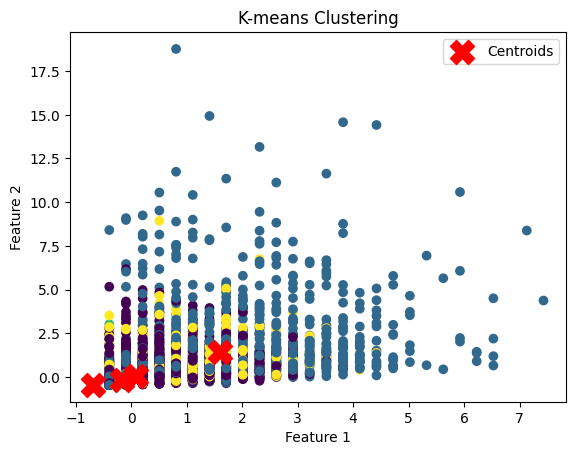

In [40]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


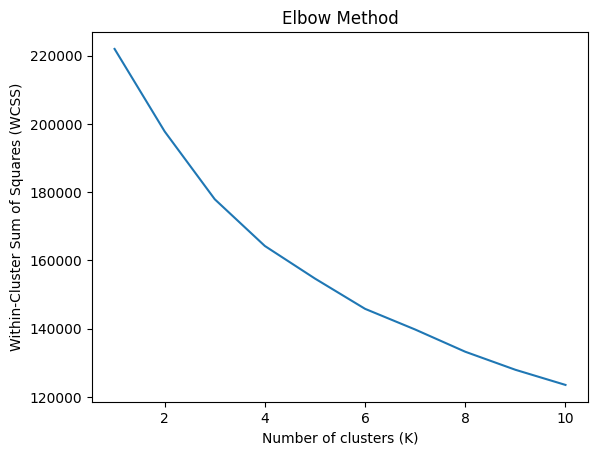

In [42]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

So the optimal value is 3

In [43]:
k_value = 3

kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

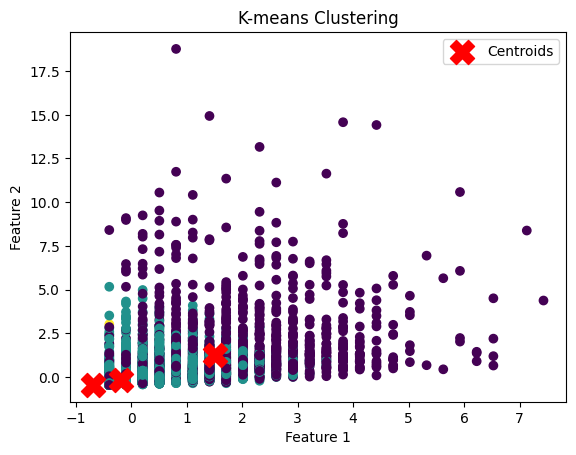

In [44]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [53]:

from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(scaled_data, method='ward')



In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data.index, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [47]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')


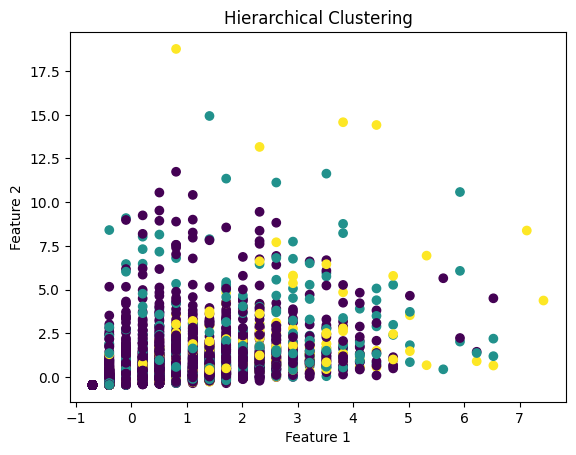

In [49]:

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [50]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(data, kmeans.labels_)
hierarchical_silhouette = silhouette_score(scaled_data, clusters)

print(f'K-means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Silhouette Score: {hierarchical_silhouette}')


K-means Silhouette Score: -0.13538865767895042
Hierarchical Silhouette Score: 0.15397918130345337


The silhouette score ranges from -1 to 1, where a higher value indicates better-defined clusters.

1. K-means Silhouette Score: -0.135:
   - A negative silhouette score suggests that the clusters may be overlapping or poorly separated.
   - It indicates that the average distance between points within the same cluster is larger than the average distance to the nearest neighboring cluster.
   - This could be an indication that the data may not naturally form well-defined clusters using K-means with the chosen number of clusters.

2. Hierarchical Silhouette Score: 0.154:
   - A positive silhouette score suggests that the clusters are, on average, well-separated and distinct.
   - It indicates that the average distance between points within the same cluster is smaller than the average distance to the nearest neighboring cluster.
   
   This suggests that hierarchical clustering, with the chosen parameters, is forming better-defined clusters compared to K-means in this specific case.


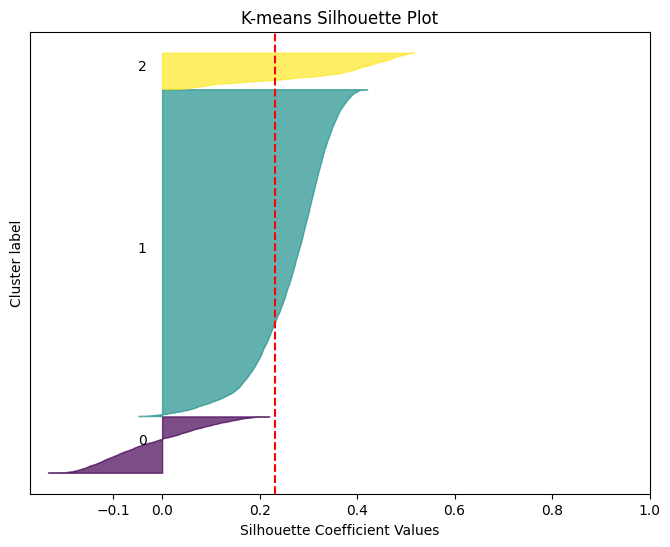

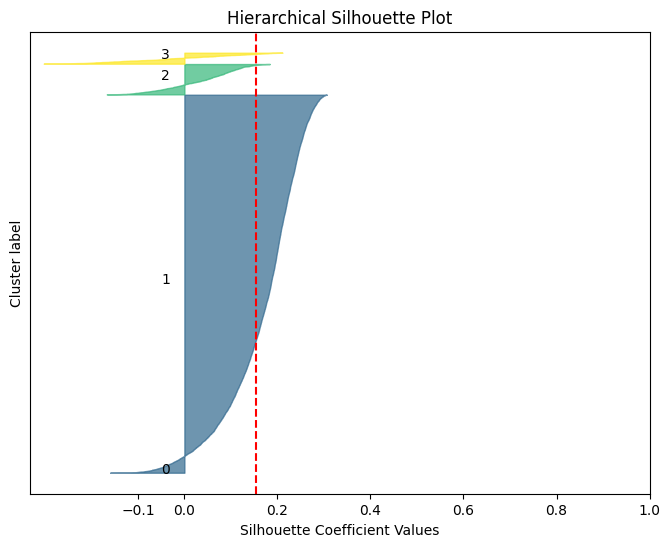

In [51]:
from sklearn.metrics import silhouette_samples

def plot_silhouette(X, labels, title):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    fig, ax = plt.subplots(figsize=(8, 6))

    y_lower = 10
    for i in range(max(labels) + 1):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.viridis(float(i) / max(labels))
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(title)
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plot_silhouette(scaled_data, kmeans.labels_, "K-means Silhouette Plot")
plt.show()


plot_silhouette(scaled_data, clusters, "Hierarchical Silhouette Plot")
plt.show()
